### Want to generate a plot that show examples of value and beliefs changing across trials

In [15]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
from scipy import stats
import warnings
from scipy.ndimage import gaussian_filter1d
import seaborn as sns

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
session = "20180802"
behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
beh = pd.read_csv(behavior_path)

# filter trials 
beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(beh)
beh = pd.merge(beh, feature_selections, on="TrialNumber", how="inner")
beh = behavioral_utils.get_beliefs_per_session(beh, session)

In [4]:
beh[beh.CurrentRule == "CIRCLE"].BlockNumber.unique()

array([ 2,  8, 10, 26, 29, 31])

In [9]:
sub_beh = beh[beh.BlockNumber.isin([10, 11])]
sub_beh["TrialIdx"] = range(len(sub_beh))

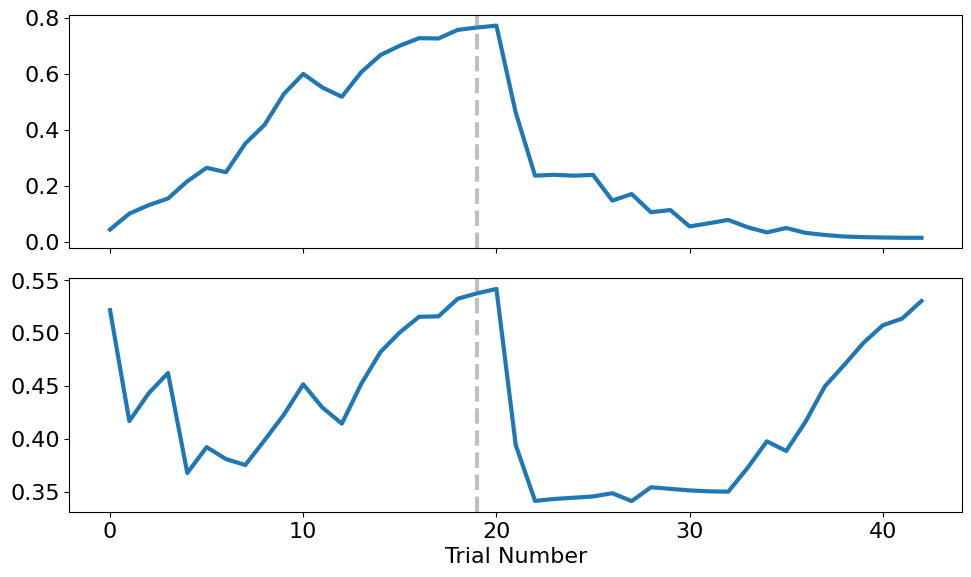

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax = axs[0]
sns.lineplot(sub_beh, x="TrialIdx", y="CIRCLEProb", ax=ax, linewidth=3)
ax.axvline(19, alpha=0.5, color='gray', linestyle='dashed', linewidth=3)
ax.set_xlabel("Trial Number")
ax.set_ylabel("")

ax = axs[1]
sns.lineplot(sub_beh, x="TrialIdx", y="BeliefStateValue", ax=ax, linewidth=3)
ax.axvline(19, alpha=0.5, color='gray', linestyle='dashed', linewidth=3)
ax.set_xlabel("Trial Number")
ax.set_ylabel("")

fig.tight_layout()


<Axes: xlabel='TrialIdx', ylabel='CIRCLEProb'>

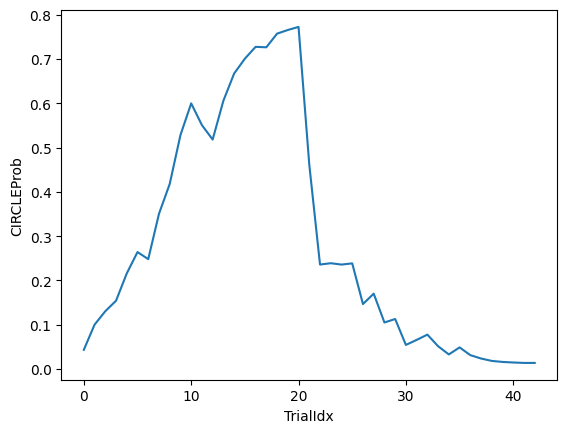

In [12]:
sns.lineplot(sub_beh, x="TrialIdx", y="CIRCLEProb")